### Max Fine Jul 1 2024

This notebook is for converting a `.h5` file into the `fitburst` generic format, and then trying to run `fitburst`

In [8]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import json


# from fitburst we need the following:
import fitburst # the fitburst package
from fitburst.analysis.peak_finder import FindPeak
from fitburst.backend.generic import DataReader
from fitburst.analysis.fitter import LSFitter
from fitburst.analysis.model import SpectrumModeler
import fitburst.utilities as ut


import h5py # new to read in h5 files


data_file = 'FRB20240209A_L1_Band_2024_06_26_10_33_18_tcand_297.8789500_dm_183.0_snr_6.1.h5'


### read in h5 file

In [9]:
# read in h5 file

data_list = [] # same as length of keys
# Open the HDF5 file
# convert into np format, with keys seperate


root_attrs_dict = {} # this is like a .fits header 
with h5py.File(data_file, 'r') as hdf:

    # makes dict with header info
    # List all attributes of the root group
    root_attrs = list(hdf.attrs.keys())
    
    # Access and store each attribute in the dictionary
    for attr in root_attrs:
        root_attrs_dict[attr] = hdf.attrs[attr]

    print(root_attrs_dict)

    print("Keys: %s" % hdf.keys()) # prints data table names

    keys = hdf.keys()

    dataset = hdf['data_dm_time']
    print("Attributes of the dataset:", list(dataset.attrs.keys()))
     # Access a specific attribute
    for attr in dataset.attrs:
        print(f"Attribute {attr}: {dataset.attrs[attr]}")


    
    keys_list = list(keys)
    print('shape of data ', np.shape(hdf))
    # Convert data from the first group to a NumPy array
    for i in range(len(keys_list)):
        data_list.append(hdf[keys_list[i]][:])
        print(keys_list[i])
        print(data_list[i])

{'basename': 'FRB20240209A_L1_Band_2024_06_26_10_33_18', 'bw': -100.0, 'cand_id': 'cand_tstart_60487.356469907783_tcand_297.8789500_dm_183.00000_snr_6.07000', 'center_freq': 1250.15625, 'dec_deg': 86.05991908929711, 'dm': 183.0, 'dm_opt': 182.4731305515137, 'dtype': 'float32', 'fch1': 1300.0, 'filelist': array(['/data/frb/2024-06-26/FRB20240209A_L1_Band_2024_06_26_10_33_18.fil'],
      dtype=object), 'filename': '/data/frb/2024-06-26/FRB20240209A_L1_Band_2024_06_26_10_33_18.fil', 'foff': -0.3125, 'format': 'fil', 'frequency_decimation_factor': 1, 'gb': 26.576921944779716, 'gl': -61.44115341552245, 'kill_mask': array([False]), 'label': -1, 'native_foff': -0.3125, 'native_nbits': 32, 'native_nchans': 320, 'native_nspectra': 3024193.0, 'native_tsamp': 0.0001984, 'nbits': 32, 'nchans': 320, 'npol': 1, 'nspectra': 3024193, 'poln_order': 'I', 'ra_deg': 289.91082173653285, 'rfi_mask': array([False]), 'snr': 6.07, 'snr_opt': 5.4635253, 'source_name': 'FRB20240209A', 'tcand': 297.87895, 'time_d

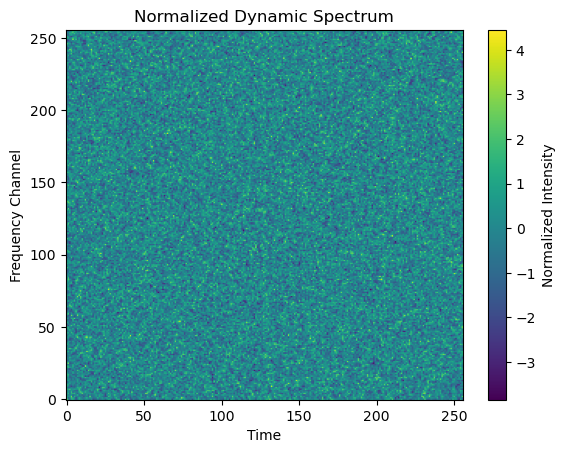

In [23]:

# Assuming data_list[1] is your dynamic spectrum
dynamic_spectrum = data_list[1].T

# Calculate the mean and standard deviation for each frequency channel
mean_per_channel = np.mean(dynamic_spectrum, axis=1, keepdims=True)
std_per_channel = np.std(dynamic_spectrum, axis=1, keepdims=True)

# Normalize each frequency channel
normalized_spectrum = (dynamic_spectrum - mean_per_channel) / std_per_channel

# Plot the normalized dynamic spectrum
plt.imshow(normalized_spectrum, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Normalized Intensity')
plt.xlabel('Time')
plt.ylabel('Frequency Channel')
plt.title('Normalized Dynamic Spectrum')
plt.show()


In [36]:


metadata = {
    "bad_chans"      : [ ],  # a Python list of indices corresponding to frequency channels to zero-weight
    "freqs_bin0"     : 1200,  # a floating-point scalar indicating the value of frequency bin at index 0, in MHz
    "is_dedispersed" : True, # a boolean indicating if spectrum is already dedispersed (True) or not (False)
    "num_freq"       : 256, # an integer scalar indicating the number of frequency bins/channels
    "num_time"       : 256,  # an integer scalar indicating the number of time bins
    "times_bin0"     : 60487.35646990778, # a floating-point scalar indicating the value of time bin at index 0, in MJD
    "res_freq"       : 100/256, # a floating-point scalar indicating the frequency resolution, in MHz
    "res_time"       :  0.000128, # a floating-point scalar indicating the time resolution, in seconds
}


# inital guess
burst_parameters = {
    "amplitude"            : [0],# a list containing the the log (base 10) of the overall signal amplitude
    "arrival_time"         : [25/1000], # a list containing the arrival times, in seconds
    "burst_width"          : [1/1000], # a list containing the temporal widths, in seconds
    "dm"                   : [0], # a list containing the dispersion measures (DM), in parsec per cubic centimeter
    "dm_index"             : [-2],# a list containing the exponents of frequency dependence in DM delay
    "ref_freq"             : [1250], # a list containing the reference frequencies for arrival-time and power-law parameter estimates, in MHz (held fixed)
    "scattering_index"     : [-4], # a list containing the exponents of frequency dependence in scatter-broadening
    "scattering_timescale" : [0], # a list containing the scattering timescales, in seconds
    "spectral_index"       : [10], # a list containing the power-law spectral indices
    "spectral_running"     : [-300], # a list containing the power-law spectral running
}

# now write data to file.
np.savez(
    "input_data.npz", 
    data_full=normalized_spectrum, 
    metadata=metadata, 
    burst_parameters=burst_parameters
)



In [25]:
ls

 fitburst_on_chime.ipynb
 fitburst_on_my_data.ipynb
'FRB 20181209Awaterfall.png'
 FRB20240209A_L1_Band_2024_06_26_10_33_18_tcand_297.8789500_dm_183.0_snr_6.1.h5
 frb_example_data_inspection_june_2024.ipynb
 input_data.npz
 npyarrays_chime/
 npyarrays_chime.zip


In [26]:
ls

 fitburst_on_chime.ipynb
 fitburst_on_my_data.ipynb
'FRB 20181209Awaterfall.png'
 FRB20240209A_L1_Band_2024_06_26_10_33_18_tcand_297.8789500_dm_183.0_snr_6.1.h5
 frb_example_data_inspection_june_2024.ipynb
 input_data.npz
 npyarrays_chime/
 npyarrays_chime.zip
 results_fitburst.json
 summary_plot.png
